In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sys
import os
import re

The wines data frame can be used for most of the further analysis moving forward. However, it is a good idea to keep the red_wine and white_wine data frames as well to do basic exploratory analysis and visualizations.



    Check how
    you can print first, last 10 records.


In [2]:
df_wines = pd.read_csv('wine-quality/wine_quality_combined.csv')
df_red = pd.read_csv('wine-quality/wine_quality_red.csv')
df_white = pd.read_csv('wine-quality/wine_quality_white.csv')


    Check

    wines.info()
    ,


In [3]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine type             6497 non-null   object 
 13  quality_label         6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB



    wines.shape

    Observe if there is missing values.



In [4]:
df_wines.shape


(6497, 14)

In [5]:
display(df_red)
display(list(df_red.columns)[:-1])


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [6]:
df_wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine type               0
quality_label           0
dtype: int64

    More details

    Can you create a table like below to compare the Descriptive Statistics between Red wine and White wine.

(mean, median, mode, range, variance, standard deviation)

As always, you can try to be more innovative using some other way of representations.

(Hint : Revisit

concat function
)

stats_compare

I will dot-plot each type of wine to check if there's a correlation between any of the charachteristics (columns) to the wine quality.

In [7]:
df_description = df_wines.describe()
display(df_description)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [8]:
df_description.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [9]:
# display(df_red.describe().loc['mean'])
# display(df_white.describe().loc['mean'])
for descriptor in df_description.index:
    print(f'\n\n\n\t\t\t===========\n\t\t\t==={descriptor}===\n\t\t\t===========\n')
    display(pd.DataFrame([df_red.describe().loc[descriptor], df_white.describe().loc[descriptor]], index = ['Red', 'White']))
    print("\n\n\n\n\n\n")
# df_mean_values=pd.DataFrame([df_red.describe().loc['mean'], df_white.describe().loc['mean']], index = ['Red', 'White'])
# df_mean_values




			===count===



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Red,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
White,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0












			===mean===



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Red,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
White,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909












			===std===



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Red,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
White,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639












			===min===



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Red,4.6,0.12,0.0,0.9,0.012,1.0,6.0,0.99007,2.74,0.33,8.4,3.0
White,3.8,0.08,0.0,0.6,0.009,2.0,9.0,0.98711,2.72,0.22,8.0,3.0












			===25%===



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Red,7.1,0.39,0.09,1.9,0.070,7.0,22.0,0.995600,3.21,0.55,9.5,5.0
White,6.3,0.21,0.27,1.7,0.036,23.0,108.0,0.991723,3.09,0.41,9.5,5.0












			===50%===



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Red,7.9,0.52,0.26,2.2,0.079,14.0,38.0,0.99675,3.31,0.62,10.2,6.0
White,6.8,0.26,0.32,5.2,0.043,34.0,134.0,0.99374,3.18,0.47,10.4,6.0












			===75%===



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Red,9.2,0.64,0.42,2.6,0.09,21.0,62.0,0.997835,3.40,0.73,11.1,6.0
White,7.3,0.32,0.39,9.9,0.05,46.0,167.0,0.996100,3.28,0.55,11.4,6.0












			===max===



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Red,15.9,1.58,1.00,15.5,0.611,72.0,289.0,1.00369,4.01,2.00,14.9,8.0
White,14.2,1.10,1.66,65.8,0.346,289.0,440.0,1.03898,3.82,1.08,14.2,9.0


One can observe that the mean value of sulfates and volatile acidity seem to be higher in red wine as compared to white wine.
Can you come up with few more observations. Write these down as comment or notes on Google Colab / Jupyter notebook

    Come up with few visualizations which compare low, medium and high quality wine.

For example,
* Predictions made on white wine would probably be more accurate since the sample size is almost 4 times greater
*  Both wines could vary greatly on free sulfur dioxide values and total sulfur dioxide
* White wine can vary more than red wine in amount of residual sugar
* the fixed acidity of white wine is approximately normaly distributed
* The pH of both wines is approximately normally distribtuted

box_compare

Can you think of other charts which explain this kind of analysis ? Try to explore different kinds of charts and choose the appropriate ones.

Come up with at least 5 more charts with explanations.

* Below are side by side comparisons of values from red and white wine:
* volatile acidity of range 0.2 - 0.4 is a reasonable predictor for higher quality of red wine.
* citric acid from 0.4 and above is a good predictor for red wine quality.
* residual sugar: 
    * for red wine, residual sugar content from 8 to 14 is a predictor for 6-7 quality rating
    * for white wine: residual sugar is not a good predictor of quality
* chlorides:
    * red wine: values above 0.15 are correlated with qualit rating of 6-5
    * white wine: same for values from 0.08
    * white wine chloride values predict medium quality wine from 2 time smaller values than red wine.
* free sulfur dioxide:
    * red wine: values above 20 predict wine quality of 6-5
    * white wine: values above 50 predict wine with quality of 5 - 8
* total sulfur dioxide:
    * red wine: values above 50 predict wine with quality 5-6
    * white wine: not a reliable predictor
* density:
    * red wine: density berween 0.994 and 0.998 is correlated with qulit between 5-6
    * white wine: density above 1 is correlated with quality between 5 - 7
* ph:
    * red wine: pH of 3 and below is correlated with higher wine quality
    * white wine: pH above 3.6 is correlated with quality between 5-7
* sulphates:
    * red wine: values from 0.75 to 1.25 are correlated with quality of 5-6
    * white wine: values from  0.8 and above are correlated with values 5-7
* alcohol:
    * red wine: the higher the alcohol content is, the higher quality it is correlated with.
    * white wine: the higher the alcohol content is, the higher the chance that the wine has quality rating of 6 

* When comparing categorical data to numerical data, use box plots
* when coparing numerical data to numerical data, use relational plot
* When looking to understand interaction between characteristics, refer to domain knowledge
* When concatenating 2 data sets shuffle the concatenated data sets with df = df.sample(frac = 1).reset_index(drop = True)

NameError: name 'sbs' is not defined

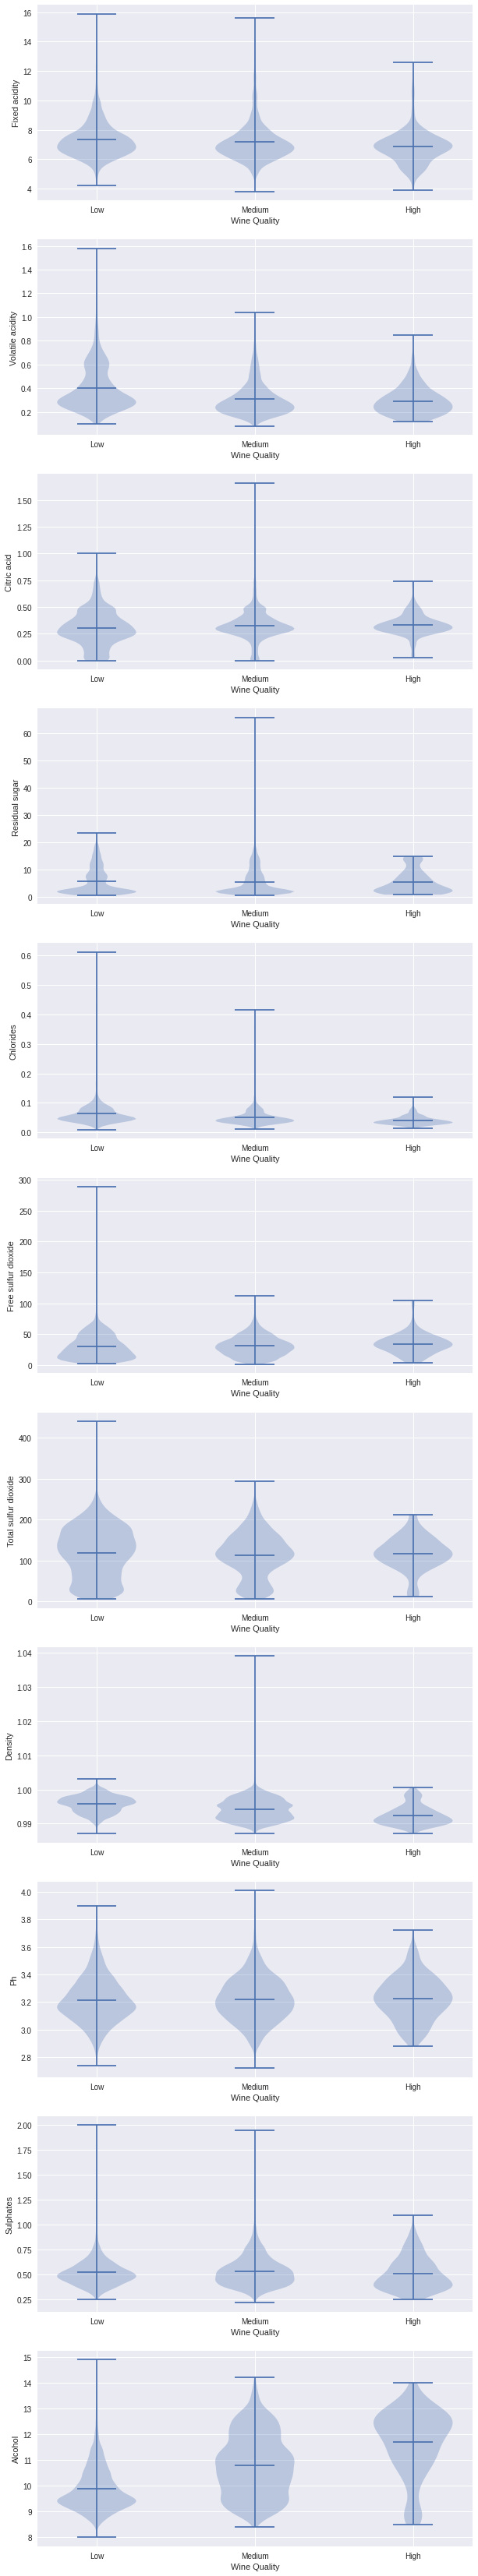

In [10]:
plt.style.use('seaborn')
list_features = list(df_wines.columns[:-3])
fig, axes = plt.subplots(nrows = len(list_features), ncols  = 1, figsize = (10,60))
plt.subplots_adjust(hspace = 0.2)
for ind,feature in enumerate(list_features):
    data = [np.array(df_wines[df_wines['quality_label'] == label][feature]) for label in list(df_wines.quality_label.unique())]
    axes[ind].violinplot(data,showmeans = True, showmedians = False)
    axes[ind].set_xlabel('Wine Quality')
    axes[ind].set_ylabel(feature.capitalize())
    axes[ind].set_xticks([i+1 for i in range(3)])
    axes[ind].set_xticklabels([label.capitalize() for label in list(df_wines.quality_label.unique())])
    # print('\n\n\n\n\n')
# for ax in axes:
# plt.setp(axes, xticks = [i+1 for i in range(3)],xticklabels=list(df_wines.quality_label.unique()))
plt.savefig('figures.png')